In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import statsmodels.formula.api as smf
from statsmodels.formula.api import glm
from statsmodels.stats.outliers_influence import variance_inflation_factor 
import statsmodels.api as sm
from patsy import dmatrix 
import matplotlib.pyplot as plt

In [2]:
#a. How often does the candidate who raised more money win a race? -
#b. How often does the candidate who spent more money win a race? -
#c. Does the difference between either money raised or money spent 
# seem to influence the likelihood of a candidate winning a race? -
#d. How often does the incumbent candidate win a race? -
#e. Can you detect any relationship between amount of money raised and
# the incumbent status of a candidate?

In [3]:
df_ex = pd.read_csv('scraped_data.csv')
df_ex

,Unnamed: 0,State,District,Name,Party,Incumbent,Winner,Vote Percentage,Raised,Spent
0,0,AL,1,Jerry Carl,R,False,True,64.9,"$1,971,321","$1,859,349"
1,1,AL,1,James Averhart,D,False,False,35.0,"$80,095","$78,973"
2,2,AL,2,Barry Moore,R,False,True,65.3,"$650,807","$669,368"
3,3,AL,2,Phyllis Harvey-Hall,D,False,False,34.6,"$56,050","$55,988"
4,4,AL,3,Mike D Rogers,R,True,True,67.5,"$1,193,111","$1,218,564"
...,...,...,...,...,...,...,...,...,...,...
803,803,WI,7,Tricia Zunker,D,False,False,39.2,"$1,261,957","$1,232,690"
804,804,WI,8,Mike Gallagher,R,True,True,64.0,"$3,202,905","$2,841,801"
805,805,WI,8,Amanda Stuck,D,False,False,36.0,"$416,978","$399,916"
806,806,WY,1,Liz Cheney,R,True,True,68.6,"$3,003,883","$3,060,167"


In [4]:
# need to change class types.  

In [5]:
#df_ex['Raised'] = df_ex['Raised'].astype(float)
#df_ex['Raised'] = df_ex['Raised'].replace(',', '')
df_ex

,Unnamed: 0,State,District,Name,Party,Incumbent,Winner,Vote Percentage,Raised,Spent
0,0,AL,1,Jerry Carl,R,False,True,64.9,"$1,971,321","$1,859,349"
1,1,AL,1,James Averhart,D,False,False,35.0,"$80,095","$78,973"
2,2,AL,2,Barry Moore,R,False,True,65.3,"$650,807","$669,368"
3,3,AL,2,Phyllis Harvey-Hall,D,False,False,34.6,"$56,050","$55,988"
4,4,AL,3,Mike D Rogers,R,True,True,67.5,"$1,193,111","$1,218,564"
...,...,...,...,...,...,...,...,...,...,...
803,803,WI,7,Tricia Zunker,D,False,False,39.2,"$1,261,957","$1,232,690"
804,804,WI,8,Mike Gallagher,R,True,True,64.0,"$3,202,905","$2,841,801"
805,805,WI,8,Amanda Stuck,D,False,False,36.0,"$416,978","$399,916"
806,806,WY,1,Liz Cheney,R,True,True,68.6,"$3,003,883","$3,060,167"


In [6]:
# Delete commas and dollar signs, make 'Raised' into a float, from another datatype:

df_ex['Raised'] = df_ex['Raised'].str.replace(',', '')
df_ex['Raised'] = df_ex['Raised'].str.replace('$', '')
df_ex['Raised'] = df_ex['Raised'].astype(float)
df_ex

C:\Users\micha\AppData\Local\Temp\ipykernel_27052\3015267476.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_ex['Raised'] = df_ex['Raised'].str.replace('$', '')


,Unnamed: 0,State,District,Name,Party,Incumbent,Winner,Vote Percentage,Raised,Spent
0,0,AL,1,Jerry Carl,R,False,True,64.9,1971321.0,"$1,859,349"
1,1,AL,1,James Averhart,D,False,False,35.0,80095.0,"$78,973"
2,2,AL,2,Barry Moore,R,False,True,65.3,650807.0,"$669,368"
3,3,AL,2,Phyllis Harvey-Hall,D,False,False,34.6,56050.0,"$55,988"
4,4,AL,3,Mike D Rogers,R,True,True,67.5,1193111.0,"$1,218,564"
...,...,...,...,...,...,...,...,...,...,...
803,803,WI,7,Tricia Zunker,D,False,False,39.2,1261957.0,"$1,232,690"
804,804,WI,8,Mike Gallagher,R,True,True,64.0,3202905.0,"$2,841,801"
805,805,WI,8,Amanda Stuck,D,False,False,36.0,416978.0,"$399,916"
806,806,WY,1,Liz Cheney,R,True,True,68.6,3003883.0,"$3,060,167"


In [7]:
# make 'Spent' into a float, from another datatype:
df_ex['Spent'] = df_ex['Spent'].str.replace(',', '')
df_ex['Spent'] = df_ex['Spent'].str.replace('$', '')
df_ex['Spent'] = df_ex['Spent'].astype(float)
df_ex

C:\Users\micha\AppData\Local\Temp\ipykernel_27052\1077864151.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_ex['Spent'] = df_ex['Spent'].str.replace('$', '')


,Unnamed: 0,State,District,Name,Party,Incumbent,Winner,Vote Percentage,Raised,Spent
0,0,AL,1,Jerry Carl,R,False,True,64.9,1971321.0,1859349.0
1,1,AL,1,James Averhart,D,False,False,35.0,80095.0,78973.0
2,2,AL,2,Barry Moore,R,False,True,65.3,650807.0,669368.0
3,3,AL,2,Phyllis Harvey-Hall,D,False,False,34.6,56050.0,55988.0
4,4,AL,3,Mike D Rogers,R,True,True,67.5,1193111.0,1218564.0
...,...,...,...,...,...,...,...,...,...,...
803,803,WI,7,Tricia Zunker,D,False,False,39.2,1261957.0,1232690.0
804,804,WI,8,Mike Gallagher,R,True,True,64.0,3202905.0,2841801.0
805,805,WI,8,Amanda Stuck,D,False,False,36.0,416978.0,399916.0
806,806,WY,1,Liz Cheney,R,True,True,68.6,3003883.0,3060167.0


In [8]:
#A potential methodology = Come up with a DataFrame that contains just the winners. 
#Then make another DataFrame that contains, for each race, the candidate who raised the most money. 
#If you can do that, then you could merge those together and then be able to do a comparision.
#pandas does also have a rank method that could come in handy: 
#https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.rank.html

In [9]:
df_ex.dtypes

Unnamed: 0           int64
State               object
District             int64
Name                object
Party               object
Incumbent             bool
Winner                bool
Vote Percentage    float64
Raised             float64
Spent              float64
dtype: object

In [10]:
#a. How often does the candidate who raised more money win a race? 
# group by state and district, then add a column that shows true if they raised the most money in their race.
df_ex['MaxRaisePer'] = df_ex.groupby(['State', 'District'])['Raised'].transform(lambda x: x == x.max())
#df_ex=df_ex.drop(['MaxRaise&Won'], axis=1)
df_ex.head()


,Unnamed: 0,State,District,Name,Party,Incumbent,Winner,Vote Percentage,Raised,Spent,MaxRaisePer
0,0,AL,1,Jerry Carl,R,False,True,64.9,1971321.0,1859349.0,True
1,1,AL,1,James Averhart,D,False,False,35.0,80095.0,78973.0,False
2,2,AL,2,Barry Moore,R,False,True,65.3,650807.0,669368.0,True
3,3,AL,2,Phyllis Harvey-Hall,D,False,False,34.6,56050.0,55988.0,False
4,4,AL,3,Mike D Rogers,R,True,True,67.5,1193111.0,1218564.0,True


In [11]:
# Subset winners only
df_ex_win = df_ex[df_ex['Winner'] == True]
df_ex_win.head()

,Unnamed: 0,State,District,Name,Party,Incumbent,Winner,Vote Percentage,Raised,Spent,MaxRaisePer
0,0,AL,1,Jerry Carl,R,False,True,64.9,1971321.0,1859349.0,True
2,2,AL,2,Barry Moore,R,False,True,65.3,650807.0,669368.0,True
4,4,AL,3,Mike D Rogers,R,True,True,67.5,1193111.0,1218564.0,True
6,6,AL,4,Robert B Aderholt,R,True,True,82.5,1255076.0,1323812.0,True
7,7,AL,5,Mo Brooks,R,True,True,95.8,655365.0,210045.0,True


In [12]:
#Subset MaxRaisePer and counted.  Compare again df_ex_win
df_ex_win_count = df_ex_win[df_ex_win['MaxRaisePer'] == True] 
df_ex_win_count

,Unnamed: 0,State,District,Name,Party,Incumbent,Winner,Vote Percentage,Raised,Spent,MaxRaisePer
0,0,AL,1,Jerry Carl,R,False,True,64.9,1971321.0,1859349.0,True
2,2,AL,2,Barry Moore,R,False,True,65.3,650807.0,669368.0,True
4,4,AL,3,Mike D Rogers,R,True,True,67.5,1193111.0,1218564.0,True
6,6,AL,4,Robert B Aderholt,R,True,True,82.5,1255076.0,1323812.0,True
7,7,AL,5,Mo Brooks,R,True,True,95.8,655365.0,210045.0,True
...,...,...,...,...,...,...,...,...,...,...,...
798,798,WI,5,Scott Fitzgerald,R,False,True,60.2,1155721.0,968406.0,True
800,800,WI,6,Glenn Grothman,R,True,True,59.3,1815756.0,1736659.0,True
802,802,WI,7,Tom Tiffany,R,True,True,60.8,2637459.0,2514740.0,True
804,804,WI,8,Mike Gallagher,R,True,True,64.0,3202905.0,2841801.0,True


In [13]:
# Answer a, as a decimal. 
a = (381/428)
a

0.8901869158878505

In [14]:
#b. How often does the candidate who spent more money win a race?
# group by state and district, then add a column that shows true if they spent the most money in their race.
df_ex['MaxSpentPer'] = df_ex.groupby(['State', 'District'])['Spent'].transform(lambda x: x == x.max())
df_ex=df_ex.drop(['MaxRaisePer'], axis=1)
df_ex.head()


,Unnamed: 0,State,District,Name,Party,Incumbent,Winner,Vote Percentage,Raised,Spent,MaxSpentPer
0,0,AL,1,Jerry Carl,R,False,True,64.9,1971321.0,1859349.0,True
1,1,AL,1,James Averhart,D,False,False,35.0,80095.0,78973.0,False
2,2,AL,2,Barry Moore,R,False,True,65.3,650807.0,669368.0,True
3,3,AL,2,Phyllis Harvey-Hall,D,False,False,34.6,56050.0,55988.0,False
4,4,AL,3,Mike D Rogers,R,True,True,67.5,1193111.0,1218564.0,True


In [15]:
# Subset into winners only, Can't use previous because of column changes
df_ex_win2 = df_ex[df_ex['Winner'] == True]
df_ex_win2

,Unnamed: 0,State,District,Name,Party,Incumbent,Winner,Vote Percentage,Raised,Spent,MaxSpentPer
0,0,AL,1,Jerry Carl,R,False,True,64.9,1971321.0,1859349.0,True
2,2,AL,2,Barry Moore,R,False,True,65.3,650807.0,669368.0,True
4,4,AL,3,Mike D Rogers,R,True,True,67.5,1193111.0,1218564.0,True
6,6,AL,4,Robert B Aderholt,R,True,True,82.5,1255076.0,1323812.0,True
7,7,AL,5,Mo Brooks,R,True,True,95.8,655365.0,210045.0,True
...,...,...,...,...,...,...,...,...,...,...,...
798,798,WI,5,Scott Fitzgerald,R,False,True,60.2,1155721.0,968406.0,True
800,800,WI,6,Glenn Grothman,R,True,True,59.3,1815756.0,1736659.0,True
802,802,WI,7,Tom Tiffany,R,True,True,60.8,2637459.0,2514740.0,True
804,804,WI,8,Mike Gallagher,R,True,True,64.0,3202905.0,2841801.0,True


In [16]:
# Subset MaxSpentPer from df_ex_win2
df_ex_win_spent = df_ex_win2[df_ex_win2['MaxSpentPer'] == True].count()
df_ex_win_spent

Unnamed: 0         378
State              378
District           378
Name               378
Party              378
Incumbent          378
Winner             378
Vote Percentage    378
Raised             378
Spent              378
MaxSpentPer        378
dtype: int64

In [17]:
# Answer b as a decimal
b = (378/428)
b

0.883177570093458

In [18]:

#df_t = df_ex(['Won'] == True).sum() / df_ex['Won'].count()
#df_t

In [19]:
#df_ex['Incumbent'].corr(df_ex['Winner'])
#df_ex['Incumbent'].plot(kind = 'bar')

# copy the data
#df_min_max_scaled = inequality_clean.copy()

# ap normalization techniques
#column = 'Gini coefficient'
#df_min_max_scaled['Gini coefficient'] = (df_min_max_scaled['Gini coefficient'] - df_min_max_scaled['Gini coefficient'].min()) / (df_min_max_scaled['Gini coefficient'].max() - df_min_max_scaled['Gini coefficient'].min())	

# view normalized data
#display(df_min_max_scaled)

In [20]:
#c. Does the difference between either money raised or money spent 
# seem to influence the likelihood of a candidate winning a race?
#Yes!
#What else to add?
# You could groupby district, then subtract larger vs smaller, then correlate
#to winner


In [21]:
#d. How often does the incumbent candidate win a race?
#Make a df of incumbents. Then compare against winners
dfi =  df_ex[df_ex['Incumbent'] == True]
dfi

,Unnamed: 0,State,District,Name,Party,Incumbent,Winner,Vote Percentage,Raised,Spent,MaxSpentPer
4,4,AL,3,Mike D Rogers,R,True,True,67.5,1193111.0,1218564.0,True
6,6,AL,4,Robert B Aderholt,R,True,True,82.5,1255076.0,1323812.0,True
7,7,AL,5,Mo Brooks,R,True,True,95.8,655365.0,210045.0,True
8,8,AL,6,Gary Palmer,R,True,True,97.1,907219.0,909082.0,True
9,9,AL,7,Terri Sewell,D,True,True,97.2,2168165.0,1495957.0,True
...,...,...,...,...,...,...,...,...,...,...,...
797,797,WI,4,Gwen Moore,D,True,True,74.7,1183995.0,1166739.0,True
800,800,WI,6,Glenn Grothman,R,True,True,59.3,1815756.0,1736659.0,True
802,802,WI,7,Tom Tiffany,R,True,True,60.8,2637459.0,2514740.0,True
804,804,WI,8,Mike Gallagher,R,True,True,64.0,3202905.0,2841801.0,True


In [22]:
#Compare incumbents against winners for answer to d.
d = (382/428)
d

0.8925233644859814

In [23]:
#e. Can you detect any relationship between amount of money raised and
# the incumbent status of a candidate?

#df_ex['Raised'].plot(kind = 'bar');

In [24]:
#Visual ideas:
# -Bifurcate by Party, make a box plot
# -Do something with top 10 raised, bottom 10 raised scatterplot. 
# Make the dots larger or smaller according to
# the amount of money spent

# -Make a scatterplot for each party, rep and dem
# 

In [25]:
#Bifurcate by rep
df_ex_r = df_ex[df_ex['Party'] == 'R']
df_ex_r

,Unnamed: 0,State,District,Name,Party,Incumbent,Winner,Vote Percentage,Raised,Spent,MaxSpentPer
0,0,AL,1,Jerry Carl,R,False,True,64.9,1971321.0,1859349.0,True
2,2,AL,2,Barry Moore,R,False,True,65.3,650807.0,669368.0,True
4,4,AL,3,Mike D Rogers,R,True,True,67.5,1193111.0,1218564.0,True
6,6,AL,4,Robert B Aderholt,R,True,True,82.5,1255076.0,1323812.0,True
7,7,AL,5,Mo Brooks,R,True,True,95.8,655365.0,210045.0,True
...,...,...,...,...,...,...,...,...,...,...,...
798,798,WI,5,Scott Fitzgerald,R,False,True,60.2,1155721.0,968406.0,True
800,800,WI,6,Glenn Grothman,R,True,True,59.3,1815756.0,1736659.0,True
802,802,WI,7,Tom Tiffany,R,True,True,60.8,2637459.0,2514740.0,True
804,804,WI,8,Mike Gallagher,R,True,True,64.0,3202905.0,2841801.0,True


In [26]:
#Perform Shapiro Wilks test for normality...
#p0=Data is non normal
#h0=data is normal
# Since p value is less than .05 we reject h0, that that data is non-normal. 
import math
import numpy as np
from scipy.stats import shapiro 
from scipy.stats import lognorm

#perform Shapiro-Wilk test for normality
shapiro(df_ex['Raised'])


ShapiroResult(statistic=0.5640338659286499, pvalue=1.0054316481530562e-40)

In [27]:
from scipy.stats import kstest
from scipy.stats import lognorm

#perform Kolmogorov-Smirnov test for normality
kstest(df_ex['Spent'], 'norm')

#Since P value is low, we reject h0. Spent data is non-normal

KstestResult(statistic=0.9938118811881188, pvalue=0.0, statistic_location=574.0, statistic_sign=-1)

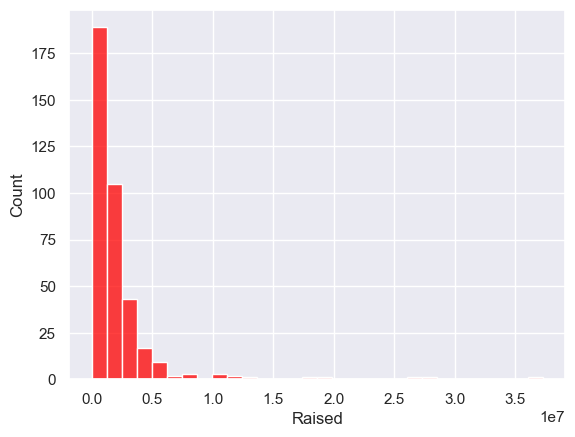

In [28]:
#df_ex_r.hist('Raised', bins=30, color = 'red', grid=False, edgecolor = 'black');
sns.set(style="darkgrid")
sns.set_context('notebook')
sns.histplot(data=df_ex_r, x='Raised',color = 'red', bins=30)
plt.show()

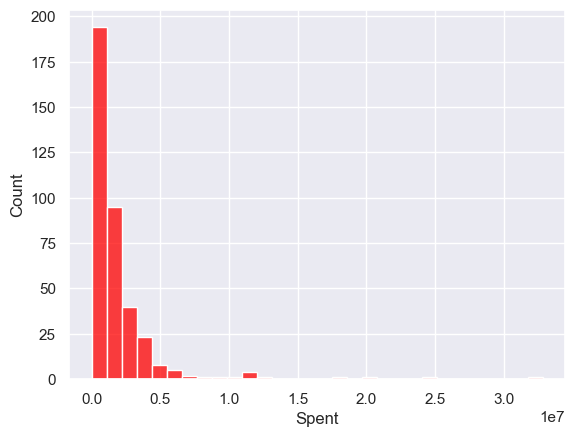

In [29]:
#df_ex_r.hist('Spent', bins=30, color = 'red', grid=False, edgecolor = 'black');
sns.set(style="darkgrid")
sns.set_context('notebook')
sns.histplot(data=df_ex_r, x='Spent',color = 'red', bins=30)
plt.show()

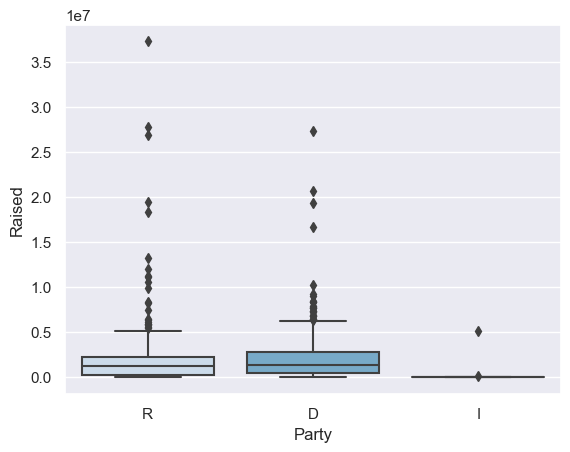

In [30]:
sns.set_context('notebook')
sns.boxplot(data=df_ex, x='Party', y="Raised", palette='Blues');

In [31]:
#Bifurcate by dem
df_ex_d = df_ex[df_ex['Party'] == 'D']
df_ex_d

,Unnamed: 0,State,District,Name,Party,Incumbent,Winner,Vote Percentage,Raised,Spent,MaxSpentPer
1,1,AL,1,James Averhart,D,False,False,35.0,80095.0,78973.0,False
3,3,AL,2,Phyllis Harvey-Hall,D,False,False,34.6,56050.0,55988.0,False
5,5,AL,3,Adia Winfrey,D,False,False,32.4,50273.0,40971.0,False
9,9,AL,7,Terri Sewell,D,True,True,97.2,2168165.0,1495957.0,True
12,12,AZ,1,Tom O'Halleran,D,True,True,51.6,3381353.0,3324138.0,True
...,...,...,...,...,...,...,...,...,...,...,...
799,799,WI,5,Tom Palzewicz,D,False,False,39.9,370392.0,371799.0,False
801,801,WI,6,Jessica King,D,False,False,40.7,287753.0,245788.0,False
803,803,WI,7,Tricia Zunker,D,False,False,39.2,1261957.0,1232690.0,False
805,805,WI,8,Amanda Stuck,D,False,False,36.0,416978.0,399916.0,False


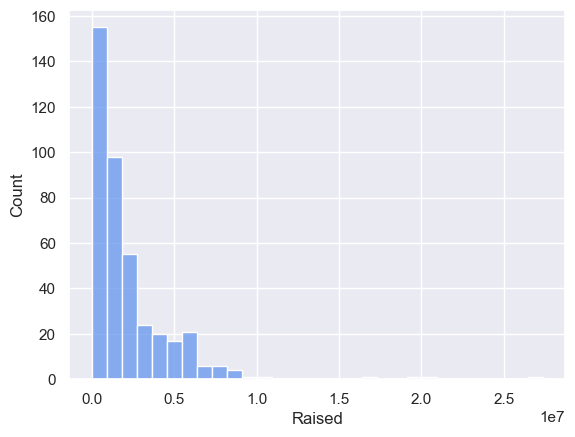

In [32]:
#df_ex_d.hist('Raised', bins=30, color = 'cornflowerblue', grid=False, edgecolor = 'black');
sns.set(style="darkgrid")
sns.set_context('notebook')
sns.histplot(data=df_ex_d, x='Raised',color = 'cornflowerblue', bins=30)
plt.show()

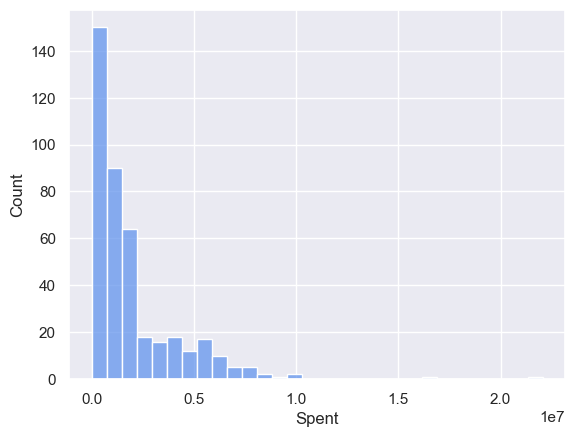

In [33]:
#df_ex_d.hist('Spent', bins=30, color = 'cornflowerblue', grid=False, edgecolor = 'black');
sns.set(style="darkgrid")
sns.set_context('notebook')
sns.histplot(data=df_ex_d, x='Spent',color = 'cornflowerblue', bins=30)
plt.show()

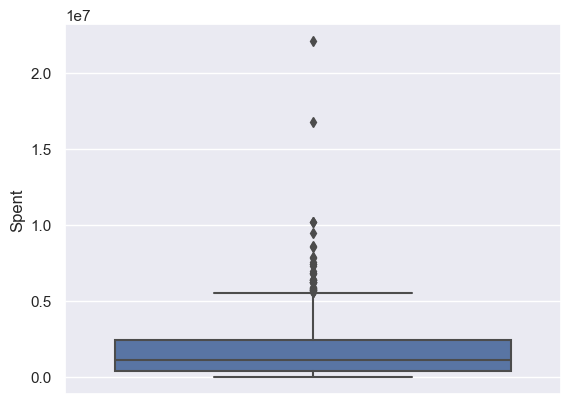

In [34]:
sns.boxplot(data=df_ex_d, y="Spent");

In [35]:
df_ex['Total_S_Per_District'] = df_ex.groupby(['State', 'District'])['Spent'].transform('sum')
df_ex['Total_R_Per_District'] = df_ex.groupby(['State', 'District'])['Raised'].transform('sum')
df_ex['Per_Spent'] = df_ex['Spent']/df_ex['Total_S_Per_District']*100
df_ex['Per_Raised'] = df_ex['Raised']/df_ex['Total_R_Per_District']*100
df_ex

,Unnamed: 0,State,District,Name,Party,Incumbent,Winner,Vote Percentage,Raised,Spent,MaxSpentPer,Total_S_Per_District,Total_R_Per_District,Per_Spent,Per_Raised
0,0,AL,1,Jerry Carl,R,False,True,64.9,1971321.0,1859349.0,True,1938322.0,2051416.0,95.925703,96.095624
1,1,AL,1,James Averhart,D,False,False,35.0,80095.0,78973.0,False,1938322.0,2051416.0,4.074297,3.904376
2,2,AL,2,Barry Moore,R,False,True,65.3,650807.0,669368.0,True,725356.0,706857.0,92.281307,92.070532
3,3,AL,2,Phyllis Harvey-Hall,D,False,False,34.6,56050.0,55988.0,False,725356.0,706857.0,7.718693,7.929468
4,4,AL,3,Mike D Rogers,R,True,True,67.5,1193111.0,1218564.0,True,1259535.0,1243384.0,96.747133,95.956760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
803,803,WI,7,Tricia Zunker,D,False,False,39.2,1261957.0,1232690.0,False,3747430.0,3899416.0,32.894277,32.362718
804,804,WI,8,Mike Gallagher,R,True,True,64.0,3202905.0,2841801.0,True,3241717.0,3619883.0,87.663451,88.480898
805,805,WI,8,Amanda Stuck,D,False,False,36.0,416978.0,399916.0,False,3241717.0,3619883.0,12.336549,11.519102
806,806,WY,1,Liz Cheney,R,True,True,68.6,3003883.0,3060167.0,True,3192402.0,3138480.0,95.857821,95.711395


In [36]:
df_ex.columns

Index(['Unnamed: 0', 'State', 'District', 'Name', 'Party', 'Incumbent',
       'Winner', 'Vote Percentage', 'Raised', 'Spent', 'MaxSpentPer',
       'Total_S_Per_District', 'Total_R_Per_District', 'Per_Spent',
       'Per_Raised'],
      dtype='object')

In [56]:
df_ex['Incumbent'] = df_ex['Incumbent'].astype(int)

In [57]:
#c. Does the difference between either money raised or money spent 
# seem to influence the likelihood of a candidate winning a race?
#Yes!

# used Vote_Percentage instead of Winner, just because it's interesting.
# p value of Vote_Percentage %_Raised = 0.00 = Significant Factor
# p value of Vote_Percentage % Spent = 0.00 = Significant Factor

#df_ex = df_ex.rename(columns={'Vote Percentage':'Vote_Percentage'})
df_ex.dtypes

Unnamed: 0                int64
State                    object
District                  int64
Name                     object
Party                    object
Incumbent                 int32
Winner                    int32
Vote_Percentage         float64
Raised                  float64
Spent                   float64
MaxSpentPer                bool
Total_S_Per_District    float64
Total_R_Per_District    float64
Per_Spent               float64
Per_Raised              float64
dtype: object

In [39]:
lmr = smf.ols('Vote_Percentage ~ Per_Raised', data = df_ex).fit()
lmr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Vote_Percentage   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     1824.
Date:                Sat, 21 Oct 2023   Prob (F-statistic):          3.60e-209
Time:                        11:23:51   Log-Likelihood:                -3012.1
No. Observations:                 808   AIC:                             6028.
Df Residuals:                     806   BIC:                             6037.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     28.9940      0.621     46.682      0.000      27.775      30.213
Per_Raised     0.4093      0.010     42.705      0.000       0.390       0.428
==============================================================================
Omnibus:                       71.788   Durbin-Watson:                   2.577
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              408.050
Skew:                          -0.064   Prob(JB):                     2.47e-89
Kurtosis:                       6.479   Cond. No.                         114.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
lmr = smf.ols('Winner ~ Per_Spent', data = df_ex).fit()
lmr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Winner   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     1576.
Date:                Sat, 21 Oct 2023   Prob (F-statistic):          7.40e-192
Time:                        12:10:12   Log-Likelihood:                -147.20
No. Observations:                 808   AIC:                             298.4
Df Residuals:                     806   BIC:                             307.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0655      0.018     -3.611      0.000      -0.101      -0.030
Per_Spent      0.0112      0.000     39.701      0.000       0.011       0.012
==============================================================================
Omnibus:                       21.129   Durbin-Watson:                   3.063
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.354
Skew:                          -0.001   Prob(JB):                     1.42e-10
Kurtosis:                       4.161   Cond. No.                         114.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
lmr = smf.ols('Winner ~ Per_Raised*Per_Spent', data = df_ex).fit()
lmr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Winner   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     598.8
Date:                Sat, 21 Oct 2023   Prob (F-statistic):          2.16e-204
Time:                        12:14:24   Log-Likelihood:                -110.77
No. Observations:                 808   AIC:                             229.5
Df Residuals:                     804   BIC:                             248.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.0517      0.022     -2.299      0.022      -0.096      -0.008
Per_Raised               0.0244      0.003      8.629      0.000       0.019       0.030
Per_Spent               -0.0132      0.003     -4.542      0.000      -0.019      -0.007
Per_Raised:Per_Spent -3.457e-06   1.08e-05     -0.321      0.748   -2.46e-05    1.77e-05
==============================================================================
Omnibus:                       32.112   Durbin-Watson:                   3.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.064
Skew:                          -0.055   Prob(JB):                     1.24e-19
Kurtosis:                       4.604   Cond. No.                     1.31e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [60]:
lmr = smf.ols('Incumbent ~ Per_Raised*Per_Spent', data = df_ex).fit()
lmr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Incumbent   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     409.8
Date:                Sat, 21 Oct 2023   Prob (F-statistic):          1.78e-161
Time:                        12:13:52   Log-Likelihood:                -210.37
No. Observations:                 808   AIC:                             428.7
Df Residuals:                     804   BIC:                             447.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.0650      0.025     -2.558      0.011      -0.115      -0.015
Per_Raised               0.0197      0.003      6.155      0.000       0.013       0.026
Per_Spent               -0.0100      0.003     -3.039      0.002      -0.016      -0.004
Per_Raised:Per_Spent   5.24e-06   1.22e-05      0.430      0.667   -1.87e-05    2.91e-05
==============================================================================
Omnibus:                       78.052   Durbin-Watson:                   2.519
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.758
Skew:                          -0.644   Prob(JB):                     5.47e-30
Kurtosis:                       4.531   Cond. No.                     1.31e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
lmr = smf.ols('Vote_Percentage ~ Per_Raised + Per_Spent + Per_Raised*Per_Spent', data = df_ex).fit()
lmr.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Vote_Percentage   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     607.2
Date:                Sat, 21 Oct 2023   Prob (F-statistic):          4.56e-206
Time:                        11:23:51   Log-Likelihood:                -3011.7
No. Observations:                 808   AIC:                             6031.
Df Residuals:                     804   BIC:                             6050.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               29.4053      0.814     36.105      0.000      27.807      31.004
Per_Raised               0.4501      0.102      4.396      0.000       0.249       0.651
Per_Spent               -0.0692      0.105     -0.658      0.511      -0.276       0.137
Per_Raised:Per_Spent     0.0003      0.000      0.676      0.500      -0.001       0.001
==============================================================================
Omnibus:                       72.361   Durbin-Watson:                   2.581
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              409.008
Skew:                          -0.090   Prob(JB):                     1.53e-89
Kurtosis:                       6.481   Cond. No.                     1.31e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [43]:
# So then we made a percentage of total for Raised and Spent 
#and then evaluated it against Vote_Percentage to look for a p-value.
#We did Vote_Percentage, because Winner is Binary vs. Vote_Percentage, 
#and we do alot with Winner in pt3. 

In [44]:
lm = smf.ols('Vote_Percentage ~ Raised', data = df_ex).fit()
lm.summary()
#df_ex.dtypes

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Vote_Percentage   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     31.98
Date:                Sat, 21 Oct 2023   Prob (F-statistic):           2.16e-08
Time:                        11:23:51   Log-Likelihood:                -3474.1
No. Observations:                 808   AIC:                             6952.
Df Residuals:                     806   BIC:                             6962.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     48.4556      0.750     64.611      0.000      46.983      49.928
Raised      1.138e-06   2.01e-07      5.655      0.000    7.43e-07    1.53e-06
==============================================================================
Omnibus:                        2.077   Durbin-Watson:                   2.722
Prob(Omnibus):                  0.354   Jarque-Bera (JB):                1.969
Skew:                           0.071   Prob(JB):                        0.374
Kurtosis:                       3.196   Cond. No.                     4.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

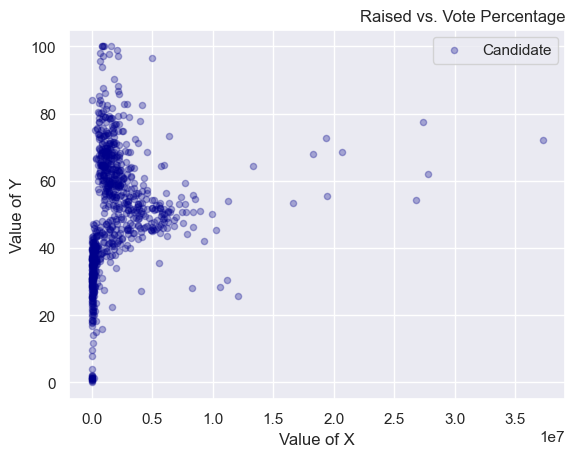

In [54]:
#How to change plot axis? In this case x...
df_ex.plot(x = 'Raised', y = 'Vote_Percentage', kind = 'scatter', color = 'darkblue', alpha=0.30,label = 'Candidate');
# Plot with small marker size
#plt.plot( 'x', 'y', "", data=df_ex, linestyle='', marker='o', markersize=0.4)
plt.xlabel('Value of X')
plt.ylabel('Value of Y')
plt.title('Raised vs. Vote Percentage', loc='right')
plt.show()

import matplotlib.pyplot as plt
import seaborn as sns
from gapminder import gapminder # data set

# data
data = gapminder.loc[gapminder.year == 2007]

# use the scatterplot function to build the bubble map
sns.scatterplot(data=df_ex, x="Vote_Percentage", y="Raised", size="", legend=False, sizes=(0, 40))

# show the graph
plt.show()

In [46]:
#e. Can you detect any relationship between amount of money raised and
# the incumbent status of a candidate?
# run a regression on amount of money raised with incumbent status as response.
# also correlation?
# convert incumbent=true or false to 1 or 0 
df_ex['Incumbent'] = df_ex['Incumbent'].astype(int)
df_ex.dtypes

Unnamed: 0                int64
State                    object
District                  int64
Name                     object
Party                    object
Incumbent                 int32
Winner                    int32
Vote_Percentage         float64
Raised                  float64
Spent                   float64
MaxSpentPer                bool
Total_S_Per_District    float64
Total_R_Per_District    float64
Per_Spent               float64
Per_Raised              float64
dtype: object

In [47]:
df_ex.head()

,Unnamed: 0,State,District,Name,Party,Incumbent,Winner,Vote_Percentage,Raised,Spent,MaxSpentPer,Total_S_Per_District,Total_R_Per_District,Per_Spent,Per_Raised
0,0,AL,1,Jerry Carl,R,0,1,64.9,1971321.0,1859349.0,True,1938322.0,2051416.0,95.925703,96.095624
1,1,AL,1,James Averhart,D,0,0,35.0,80095.0,78973.0,False,1938322.0,2051416.0,4.074297,3.904376
2,2,AL,2,Barry Moore,R,0,1,65.3,650807.0,669368.0,True,725356.0,706857.0,92.281307,92.070532
3,3,AL,2,Phyllis Harvey-Hall,D,0,0,34.6,56050.0,55988.0,False,725356.0,706857.0,7.718693,7.929468
4,4,AL,3,Mike D Rogers,R,1,1,67.5,1193111.0,1218564.0,True,1259535.0,1243384.0,96.747133,95.956760


In [64]:
#df_ex['Raised'].max()
df_ex['Winner'].corr(df_ex['Spent'])

0.2062508126969103

In [65]:
# creating dummies for Winner
df_ex['Winner'] = df_ex['Winner'].map({'False':0, 'True':1}) 
  
# the independent variables set 
X = df_ex[['Per_Raised', 'Per_Spent', 'Vote_Percentage',]] 
  
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["Feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_data)
#Indicates high multicolinearity

           Feature         VIF
0       Per_Raised  334.709227
1        Per_Spent  343.377167
2  Vote_Percentage    7.958437


In [50]:
df_ex.to_csv('scraped_data_pt_3.csv')

In [51]:
#Run Linear
lmp = glm('Incumbent ~ Raised', data = df_ex).fit()
lmp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Incumbent   No. Observations:                  808
Model:                            GLM   Df Residuals:                      806
Model Family:                Gaussian   Df Model:                            1
Link Function:               Identity   Scale:                         0.23598
Method:                          IRLS   Log-Likelihood:                -562.13
Date:                Sat, 21 Oct 2023   Deviance:                       190.20
Time:                        11:23:51   Pearson chi2:                     190.
No. Iterations:                     3   Pseudo R-squ. (CS):            0.05705
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3959      0.020     19.394      0.000       0.356       0.436
Raised      3.774e-08   5.48e-09      6.889      0.000     2.7e-08    4.85e-08
==============================================================================
"""

In [52]:
#Has a low value.